In [1]:
import json
import os

import networkx as nx

from autocnet.graph import network
from autocnet.examples import get_path, available
from autocnet.fileio import io_gdal

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Instantiate an empty candidate graph
G = network.CandidateGraph()

In [3]:
#Get a list of the available sample data
images = []
for fi in available('Apollo15'):
    d = get_path(fi)
    if '.json' in d:
        continue
    geods = io_gdal.GeoDataSet(get_path(fi))
    images.append(geods)
images

[AS15-M-0295_SML.png,
 AS15-M-0296_SML.png,
 AS15-M-0297_SML.png,
 AS15-M-0298_SML.png,
 AS15-M-0299_SML.png,
 AS15-M-0300_SML.png]

In [4]:
adjacency = {'AS15-M-0295_SML.png': [],
 'AS15-M-0296_SML.png':['AS15-M-0297_SML.png', 'AS15-M-0298_SML.png', 'AS15-M-0299_SML.png'],
 'AS15-M-0297_SML.png':['AS15-M-0296_SML.png', 'AS15-M-0298_SML.png', 'AS15-M-0299_SML.png', 'AS15-M-0300_SML.png'],
 'AS15-M-0298_SML.png':['AS15-M-0296_SML.png', 'AS15-M-0297_SML.png', 'AS15-M-0299_SML.png', 'AS15-M-0300_SML.png'],
 'AS15-M-0299_SML.png':['AS15-M-0296_SML.png', 'AS15-M-0297_SML.png', 'AS15-M-0298_SML.png', 'AS15-M-0300_SML.png'],
 'AS15-M-0300_SML.png':['AS15-M-0297_SML.png', 'AS15-M-0298_SML.png', 'AS15-M-0299_SML.png']}

In [5]:
#Add the images to the graph as nodes
for i in images:
    G.add_image(os.path.basename(i.filename), geodataset=i)

/Users/jlaura/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


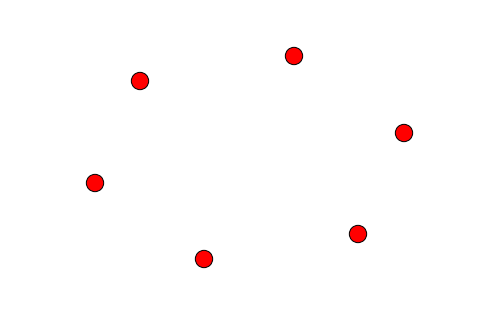

In [6]:
nx.draw(G)
show()

In [7]:
#Add single edges to the graph
basename = 'AS15-M-0{}_SML.png'
for k,v in adjacency.iteritems():
    for i in v:
        G.add_edge(k,i)

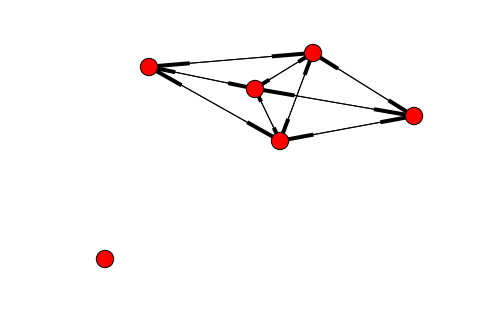

In [8]:
nx.draw(G, label=G.nodes())
show()

In [9]:
G.adjacency_to_json('/Users/jlaura/github/autocnet/autocnet/examples/Apollo15/adjacency.json')

In [10]:
G2 = network.CandidateGraph.from_adjacency('/Users/jlaura/github/autocnet/autocnet/examples/Apollo15/adjacency.json')

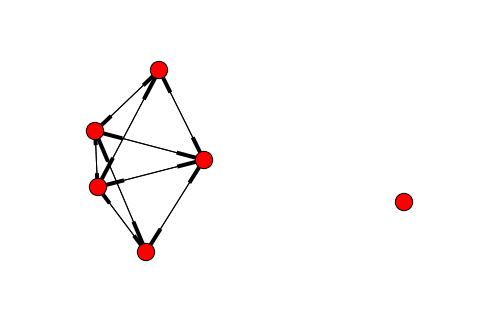

In [11]:
nx.draw(G2)

In [ ]:
for n in G.nodes():
    print n, G.neighbors(n)

In [ ]:
G.edges()

In [ ]:
#Perform a check to see if the subgraph is connected
print nx.is_strongly_connected(G)

In [ ]:
#Get a list fo the nodes in each subgraph, no connectivity
print len(list(nx.strongly_connected_components(G)))

In [ ]:
#Return the graph objecets for the sub-graphs
for sg in nx.strongly_connected_component_subgraphs(G, copy=False):
    print sg.nodes()